In [1]:
# imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import RegularPolygon, Polygon
import pandas as pd
import numpy as np
import math

%matplotlib inline


In [2]:
# define matplotlib params
#  update the matplotlib params

params = {'font.style':'normal','font.size':8}
mpl.rcParams.update(params)
mpl.rcParams["axes.edgecolor"] = "0.1"
mpl.rcParams["axes.linewidth"]  = 0.75

# Question 1
<h2><strong>Drawing an Hexagon</strong></h2>
<p>The hexagon of radius 10, equal to sidelength is drawn using Matplotlib Polygon</p>

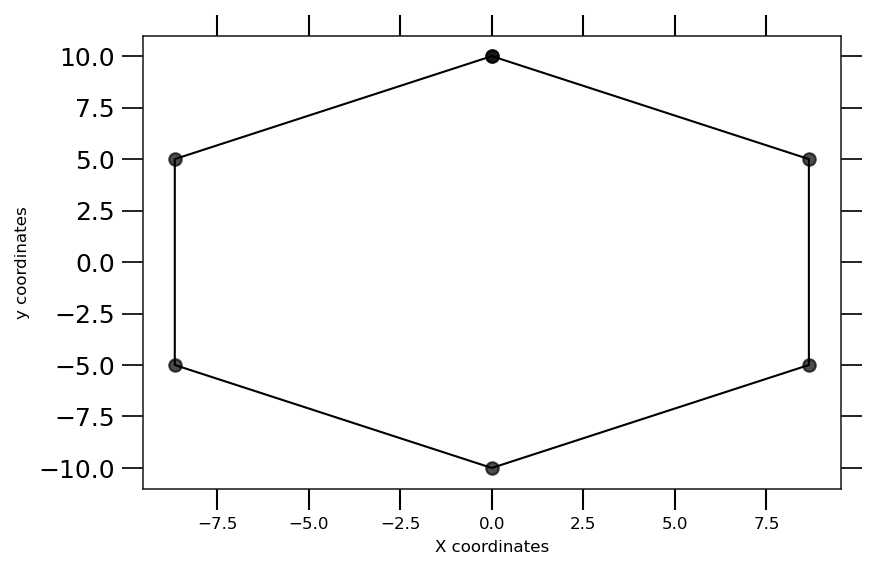

In [3]:
from drawhexagon import Hexagon, Point
hexagon = Hexagon()
hexagon.show_figure()

<h2><strong>Quiz 1.2 User Input of a Random Point && Validation.</strong></h2>
<br/>
The <em>Random Point coordinates </em> <strong> should </strong> be confined within the Hexagon path.
<br>
Validation of the user inputs is done by summing up the 6 areas created by connecting the random point to the hexagon vertices and equating with the area of the polygon.

The point is within the Hexagon <em> iff </em> 
$$\sum_{i=1}^{i=6}A_i\approx A_hex $$ where $A_i$ is the area of the individual triangle.<br/>

Given coordinates, the formula to obtain the area of a triangle is:

$$ \left(\dfrac{1}{2}\right)|(x1(y2-y3)+x2(y3-y1)+x3(y1-y2)|$$
where $x1,x2,x3$ and $y1,y2,y3$ are the cordinates of the vertices of a triangle and the area of a regular hexagon of length $s$ is:

$$3\sqrt{3}*s^2/2$$


In [5]:
# user input of a random point.
# the x, and y ranges are approximated

random_x = hexagon.inputNumber('Enter the x coordinate. Between -8, and 8 ')
random_y = hexagon.inputNumber('Enter the y coordinate. Between -10 and 10 ')
random_point = (random_x,random_y)

Enter the x coordinate. Between -8, and 8 6
Enter the y coordinate. Between -10 and 10 6


<h2><strong>Plotting the Random Triangle</strong></h2>
Plot the Random P and the Triangle if the user inputs are within the Hexagon 

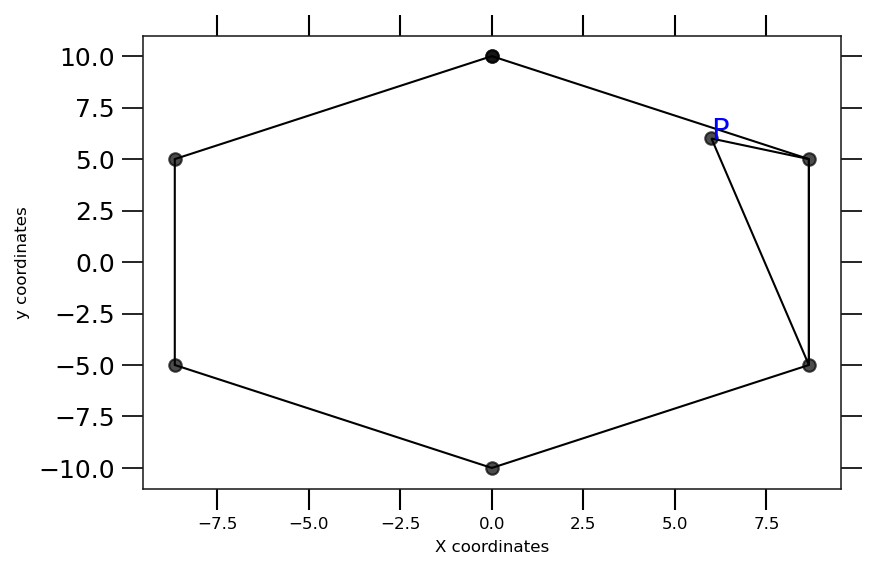

In [8]:
hexagon.random_tri(random_point = random_point, validate=True)
triangle = hexagon.draw_triangle()

hexagon.show_figure(triangle=triangle)


<strong><h2>Quiz 1.3 Centroid of a triangle</h2></strong>
Using equation below to obtain the centroid of a triangle $$\left(\dfrac{x1+x2+x3}{3}, \dfrac{y1+y2+y3}{3}\right)$$

where $x1,x2,x3$ and $y1,y2,y3$ are the cordinates of the vertices of a triangle

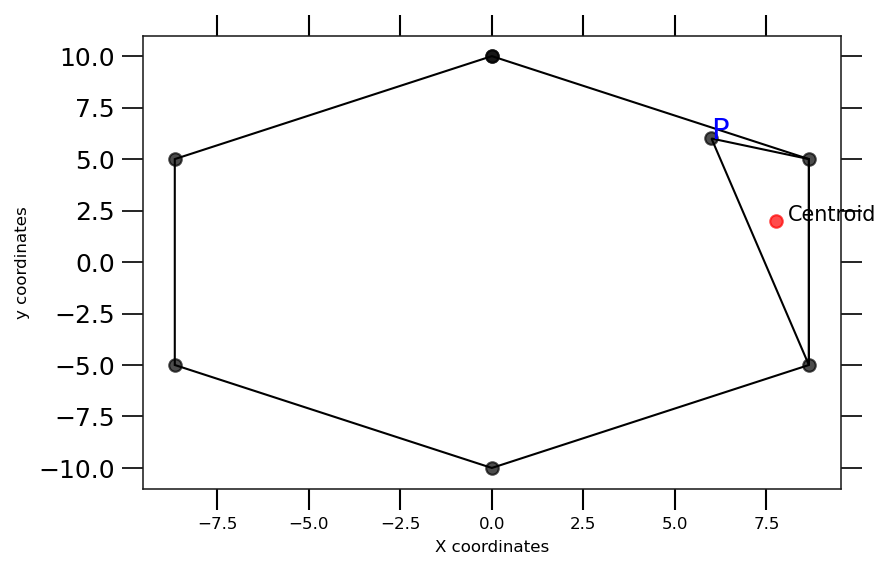

In [9]:
triangle = hexagon.draw_triangle()
hexagon.show_figure(triangle=triangle,centroid =True)
centroid1 = hexagon.centroid_triangle()

<h2> <strong>Quiz 1.3.1 Centroid as Point P </strong></h2>

(array([-12.5, -10. ,  -7.5,  -5. ,  -2.5,   0. ,   2.5,   5. ,   7.5,
         10. ,  12.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

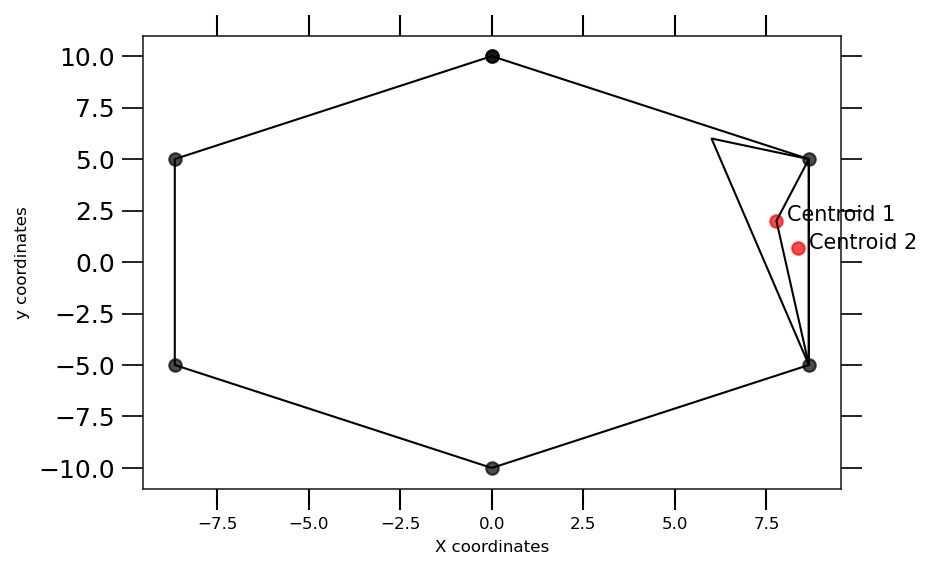

In [10]:
import copy

x = copy.copy(triangle)
# hexagon.random_tri(random_point = p)
# triangle = hexagon.draw_triangle()
points,rect,points_list = hexagon.draw_hexagon()



# triangle two with centroid 1 as p
hexagon = Hexagon()
hexagon.random_tri(random_point = centroid1)
tri_2 = hexagon.draw_triangle()
centroid2 = hexagon.centroid_triangle()


fig = plt.figure(figsize=(6,4),dpi=150)
ax = fig.add_subplot(111)

 #centroid of the triangle

ax.scatter(points[:, 0], points[:, 1],alpha=0.7, c = 'k');
ax.scatter(centroid1[0],centroid1[1],alpha = 0.7, c = 'r')
x.axes = None
x.axes = None
x.figure = None
x.set_transform(ax.transData)

ax.add_patch(rect);
ax.add_patch(x)
ax.add_patch(tri_2)
ax.text(centroid2[0]+0.3,centroid2[1],'Centroid 2',color='k', fontsize = 10)
ax.scatter(centroid2[0],centroid2[1],alpha = 0.7, c = 'r')
plt.xlabel('X coordinates')
plt.ylabel('y coordinates')
ax.text(centroid1[0]+0.3,centroid1[1],'Centroid 1',color='k', fontsize = 10)
ax.tick_params(axis='x',which='major',length=10,direction='out',width=1,top=True)
ax.tick_params(axis='y',which='major',length=10,right=True)
plt.yticks(fontsize=12)

<h2> <strong>Quiz 1.4 Scatter Plot </strong></h2>
<p> A scatter of plot of random points</p>

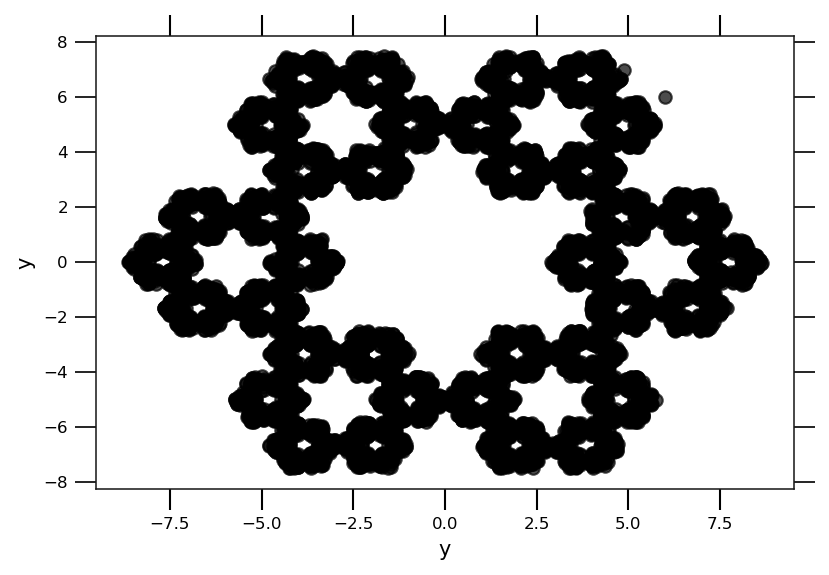

In [12]:
def points():
  p = random_point #inherit random point from the user input.
  random_points = []
  for point in range(10000):
    hexagon = Hexagon()
    hexagon.random_tri(random_point = p)
    triangle = hexagon.draw_triangle()
    centroid = hexagon.centroid_triangle()
    random_points.append(centroid)
    p = centroid
  
  return random_points

random_points = np.asarray(points())

# making a scatterplot of the points

fig = plt.figure(figsize=(6,4),dpi=150)


plt.scatter(random_points[:, 0], random_points[:, 1],alpha=0.7, c = 'k');
plt.scatter(random_x,random_y,alpha = 0.7, c = 'k')

plt.xlabel('y',fontsize = 10)
plt.ylabel('y', fontsize = 10)
plt.tick_params(axis='x',which='major',length=10,direction='out',width=1,top=True)
plt.tick_params(axis='y',which='major',length=10,right=True)
plt.show()

<h2><strong>Scatter Plot Discussion</strong></h2>
<em>The random points are plotted inside the main hexagon. Majority of the plots reside within the vertices of the Hexagon. Hexagon shaped plots around the vertices of the main hexagon are formed.</em>

# Question 2: 

In [14]:
# imports
import gzip
import os

<p><strong>Quiz 2.1 & 2.2</strong> </p>

---



In [17]:
# the function below will read the csv files and drop drop duplicates
files_path = os.path.join(os.getcwd(),'DSI_Pre_Assignment_2022') #files path


def read_files(file_name):
  # join the dir path and file name
    file_path = os.path.join(files_path, file_name)
      # open the gz files
    with gzip.open(file_path, 'rb') as f:
      df = pd.read_csv(f,sep = '\t',low_memory=False)  
    # drop duplicates
      df = df.drop_duplicates()
      return df

In [18]:
df_akas = read_files('title.akas.tsv.gz')   #read akas files
df_basics = read_files('title.basics.tsv.gz') #read basics files
df_ratings = read_files('title.ratings.tsv.gz') #read ratings files

<h3><strong>Quiz 2.3.1</strong> </h3>
<p> Merging done in two steps. </p>

In [19]:
# inner join
df_inner_merge = df_akas.merge(df_basics, how='inner', left_on='titleId', right_on='tconst').merge(df_ratings,how='inner', on = 'tconst')

# outer join
df_outer_merge = df_akas.merge(df_basics, how='outer', left_on='titleId', right_on='tconst').merge(df_ratings,how='outer', on = 'tconst')

print(df_inner_merge.shape)
print(df_outer_merge.shape)


(1686547, 19)
(6740089, 19)


<p><em>From dataframe shape function, there exists more rows in an outer join compared to inner join. Actually, in an inner join the left and right table nulls are rejected whereas in an outer join, all the data are joined.</em></p>

<h3><strong>Quiz 2.3.2</strong> </h3>
<p> Unique title types </p>

In [20]:
# remove nans
df_ = df_outer_merge[df_outer_merge['titleType'].notnull()]
unique_array = df_['titleType'].unique()

print(f'The number of unique title types: {len(unique_array.tolist())}')


The number of unique title types: 10


<h3><strong>Quiz 2.4</strong> </h3>
<p> Conditionals </p>

In [21]:
# defining filters

lang = df_outer_merge.language == 'en' 
region = df_outer_merge.region == 'US'
title_type = df_outer_merge.titleType == 'movie'

df__ =  df_outer_merge[(lang | region) & title_type]
df_new = df__.copy()

# reset the dataframe index
df_new.reset_index(inplace=True, drop=True)
df_new.head(5)


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,3.0,Miss Jerry,US,\N,\N,\N,0,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894,\N,45,Romance,5.5,70.0
1,tt0000147,1.0,The Corbett-Fitzsimmons Fight,US,\N,\N,\N,0,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0.0,1897,\N,20,"Documentary,News,Sport",5.2,266.0
2,tt0000630,4.0,Hamlet,US,\N,\N,\N,0,tt0000630,movie,Hamlet,Amleto,0.0,1908,\N,\N,Drama,3.1,10.0
3,tt0000679,1.0,The Fairylogue and Radio-Plays,US,\N,\N,\N,0,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0.0,1908,\N,120,"Adventure,Fantasy",5.9,26.0
4,tt0000838,4.0,The Cultivation of the Cacao Tree,XWW,en,\N,literal English title,0,tt0000838,movie,A Cultura do Cacau,A Cultura do Cacau,0.0,1909,\N,\N,\N,NaN,NaN


<h3><strong>Quiz 2.5</strong> </h3>
<p> $\log_{10}NumVotes$ </p>

In [22]:
df_new['log10Votes'] = df_new['numVotes'].apply(lambda x: np.log10(x))
df_new.head(5)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,log10Votes
0,tt0000009,3.0,Miss Jerry,US,\N,\N,\N,0,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894,\N,45,Romance,5.5,70.0,1.845098
1,tt0000147,1.0,The Corbett-Fitzsimmons Fight,US,\N,\N,\N,0,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0.0,1897,\N,20,"Documentary,News,Sport",5.2,266.0,2.424882
2,tt0000630,4.0,Hamlet,US,\N,\N,\N,0,tt0000630,movie,Hamlet,Amleto,0.0,1908,\N,\N,Drama,3.1,10.0,1.000000
3,tt0000679,1.0,The Fairylogue and Radio-Plays,US,\N,\N,\N,0,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0.0,1908,\N,120,"Adventure,Fantasy",5.9,26.0,1.414973
4,tt0000838,4.0,The Cultivation of the Cacao Tree,XWW,en,\N,literal English title,0,tt0000838,movie,A Cultura do Cacau,A Cultura do Cacau,0.0,1909,\N,\N,\N,NaN,NaN,NaN


<h3><strong>Quiz 2.6</strong> </h3>
<p> Lowering the texts case </p>

In [23]:
df_new["genres"] = df_new["genres"]. str. lower()

df_new.head(5)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,log10Votes
0,tt0000009,3.0,Miss Jerry,US,\N,\N,\N,0,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894,\N,45,romance,5.5,70.0,1.845098
1,tt0000147,1.0,The Corbett-Fitzsimmons Fight,US,\N,\N,\N,0,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0.0,1897,\N,20,"documentary,news,sport",5.2,266.0,2.424882
2,tt0000630,4.0,Hamlet,US,\N,\N,\N,0,tt0000630,movie,Hamlet,Amleto,0.0,1908,\N,\N,drama,3.1,10.0,1.000000
3,tt0000679,1.0,The Fairylogue and Radio-Plays,US,\N,\N,\N,0,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0.0,1908,\N,120,"adventure,fantasy",5.9,26.0,1.414973
4,tt0000838,4.0,The Cultivation of the Cacao Tree,XWW,en,\N,literal English title,0,tt0000838,movie,A Cultura do Cacau,A Cultura do Cacau,0.0,1909,\N,\N,\n,NaN,NaN,NaN


<h3><strong>Quiz 2.7.1</strong> </h3>
<p> Groupby: Mean of log10Votes</p>

In [24]:

grouped_data = df_new.groupby('genres')
log_10_votes = grouped_data['log10Votes'].mean().sort_values(ascending = False).head(10)
log_10_votes

genres
action,fantasy,war            5.405722
action,family,romance         4.801753
animation,drama,war           4.396304
family,music,musical          4.396252
documentary,sport,thriller    4.386731
action,adventure,sci-fi       4.373261
horror,musical,sci-fi         4.340484
biography,fantasy,horror      4.271842
adventure,sci-fi,thriller     4.180897
adventure,drama,sci-fi        4.123983
Name: log10Votes, dtype: float64

<h3><strong>Quiz 2.7.2</strong> </h3>
<p> Groupby: Mean of Average Rating</p>

In [25]:
avgrating = grouped_data['averageRating'].mean().sort_values(ascending = False).head(10)
avgrating

genres
documentary,history,western        9.300000
history,sport                      9.200000
documentary,news,reality-tv        8.800000
animation,crime,documentary        8.525000
biography,history,music            8.500000
documentary,drama,thriller         8.433333
adventure,documentary,western      8.433333
comedy,mystery,sport               8.400000
action,documentary,fantasy         8.300000
biography,documentary,talk-show    8.300000
Name: averageRating, dtype: float64

<h3><strong>Quiz 2.8</strong> </h3>
<p> Scatter plot of averageRating vs log10Votes</p>
<em>The average rating plotted against mean and median of individual group</em>

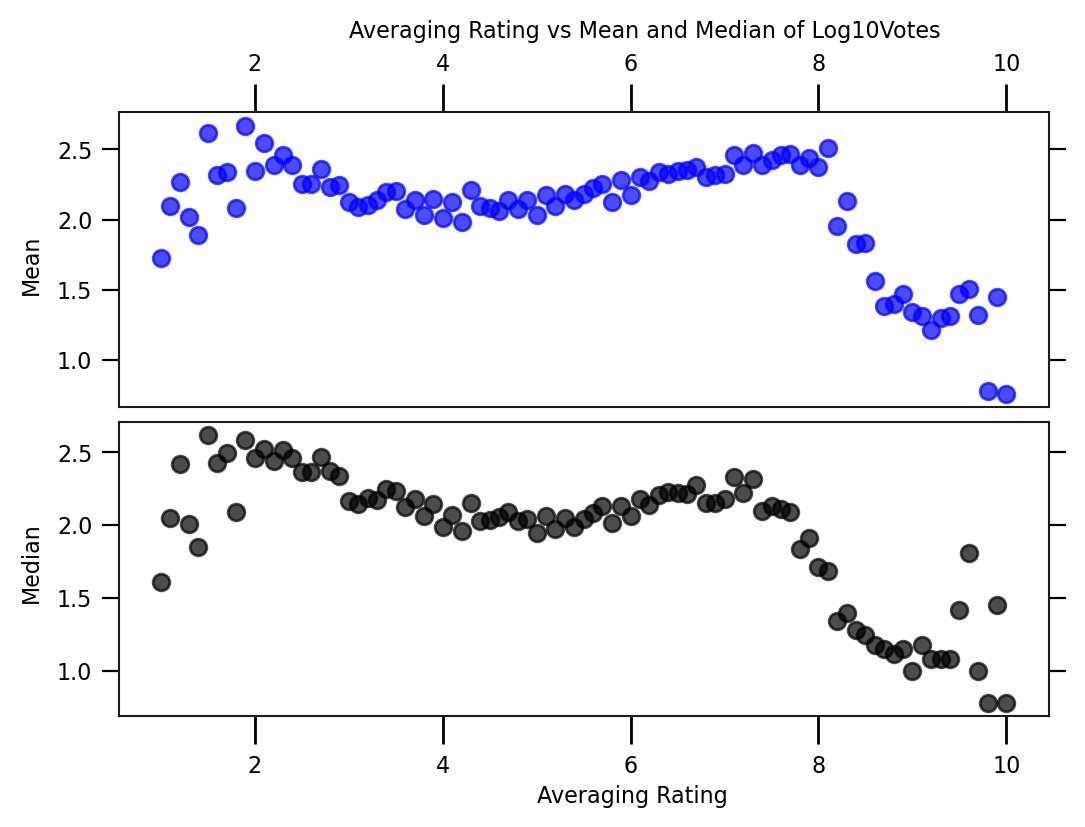

In [26]:
# groupby avg rating and obtain the mean and median of the data points
averageRating = df_new.groupby('averageRating')['log10Votes']
df_agg = averageRating.agg(['mean','median'])
df_agg

# data points
x = df_agg.index
mean = df_agg['mean']
median = df_agg['median']

gs = gridspec.GridSpec(2,1)
gs.update(wspace=0.05,hspace=0.05)


fig = plt.figure(figsize=(6,4),dpi=200)
ax = fig.add_subplot(gs[0,0])

ax.scatter(x, mean,alpha=0.7, c = 'b');
ax.grid(False)
ax.tick_params(axis='x',which='major',length=10,direction='out',width=1,top=True,bottom=False)
ax.tick_params(axis='y',which='major',length=6,right=True,left=True)
ax.tick_params(labelbottom=False,labeltop=True)
ax.text(3,3.3, 'Averaging Rating vs Mean and Median of Log10Votes')
ax.text(-.5,1.5, 'Mean',rotation =90)

ax1= fig.add_subplot(gs[1,0])
ax1.scatter(x, median,alpha=0.7, c = 'k');
ax1.tick_params(axis='x',which='major',length=10,direction='out',width=1,top=False,bottom=True)
ax1.tick_params(axis='y',which='major',length=6,right=True,left=True)
ax1.tick_params(labelbottom=True,labeltop=False)
ax1.text(-.5,1.5, 'Median',rotation =90)
ax1.text(5,0.1, 'Averaging Rating')

plt.show()

<p><em>scatter plot of averageRating The mean and median of log10Votes vs averageRating shows a similar trend.</em></p>

<h2><strong>Quiz 2.9.1. Scipy</strong></h2>

In [27]:
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error

#  use the x and mean from 2.8
res = linregress(x, mean)

# function to calculate predicted values from linregress
def y_predicted():
  y_pred = []
  for value in x:
    y =  res.intercept + res.slope*value
    y_pred.append(y) 

  return y_pred

y_pred = y_predicted()

print(f'The y intercept is: {res.intercept} and the slope is: {res.slope}')

# calculate the root mse

error = mean_squared_error(mean, y_pred)

print(f'The Root mse from scipy is: {error}')


The y intercept is: 2.5105531440478197 and the slope is: -0.07894133621603047
The Root mse from scipy is: 0.11061617699737193


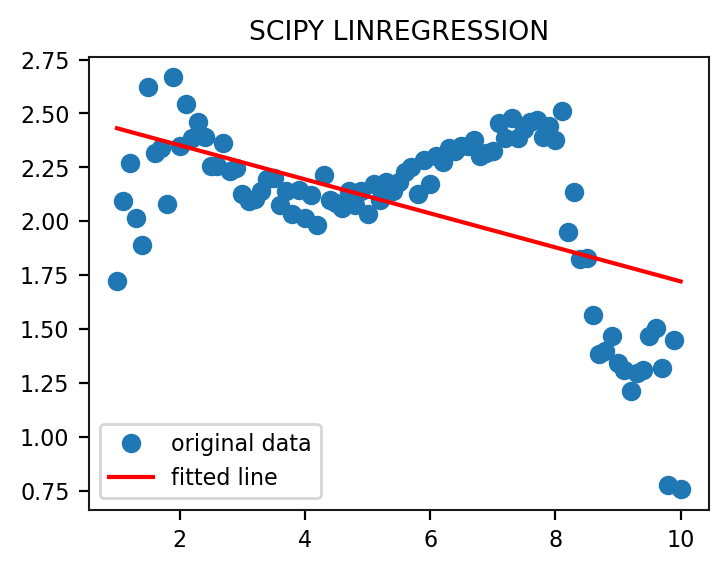

In [28]:
fig = plt.figure(figsize=(4,3),dpi=200)

ax= fig.add_subplot(111)
ax.plot(x, mean, 'o', label='original data')
ax.plot(x, y_pred, 'r', label='fitted line')
ax.legend()
plt.title('SCIPY LINREGRESSION')

plt.show()

<h2><strong>Quiz 2.9.2. SKLEARN</strong></h2>

<em>The slope and the the y intercept of simple linear regression using scikit-learn is similar to using scipy, and therefore the same RMSE </em>

In [29]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x.values.reshape(-1,1), mean)


print(f'The y intercept is: {reg.intercept_} and the slope is: {(reg.coef_)[0]}')


The y intercept is: 2.51055314404782 and the slope is: -0.0789413362160305


<h2><strong>Quiz 2.9.3. Torch</strong></h2>

In [30]:
import torch
import torch.nn as nn

# Prepare data
X_numpy, y_numpy = [x.values.reshape(-1,1),mean.array]

# cast to torch Tensor
# make it float 32

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# Model

input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

# Loss and optimizer
learning_rate = 0.01


criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Traing
# specify the numpy of epochs as 1000

num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 1000 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


y_pred = model(X).detach().numpy()

# The slope and the y_intercept of the neural network

m = model.weight.data.numpy()[0][0] #slope
b = model.bias.data.numpy()[0]   # y_intercept
print()
print(f'The y intercept is: {b} and the slope is: {m}')

# rmse calculation

error = mean_squared_error(mean, y_pred)

print(f'The Root mse from scipy is: {error}')


epoch: 1000, loss = 0.1115

The y intercept is: 2.4424960613250732 and the slope is: -0.06881607323884964
The Root mse from scipy is: 0.1114765406986243


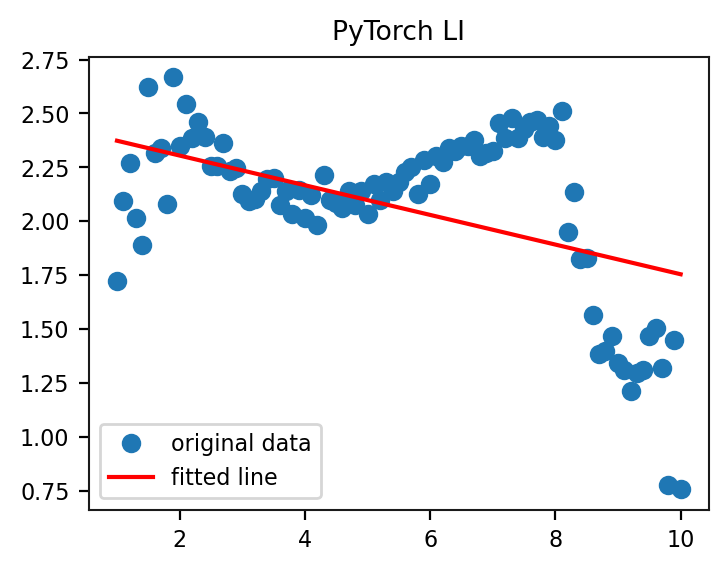

In [31]:
# making plots
fig = plt.figure(figsize=(4,3),dpi=200)

ax= fig.add_subplot(111)
ax.plot(X_numpy, mean, 'o', label='original data')
ax.plot(X_numpy, y_pred, 'r', label='fitted line')
ax.legend()
plt.title('PyTorch LI')

plt.show()


<h2><strong>Question 2.9 Review </strong></h2>
<br/>
<p> Using Scipy and Sklearn produces similar results for linear regression. There is slight disparity using pytorch, based on sum of residue squares.</p>